In [1]:
import matplotlib.pyplot as plt
import matplotlib_aximgcache as mpl_aic

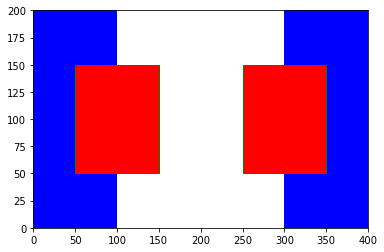

In [2]:
fig, ax = plt.subplots()

import matplotlib.patches as mpatches

ax.set_xlim(0, 400)
ax.set_ylim(0, 200)

# Create a reference image with some shapes that extend to the edges
# of the figure and with whitespace in the middle so that we can
# test that transparency works
rects = [
    mpatches.Rectangle((0, 0), 100, 200, linewidth=1, edgecolor="none", facecolor="b"),
    mpatches.Rectangle(
        (400, 0), -100, 200, linewidth=1, edgecolor="none", facecolor="b"
    ),
    mpatches.Rectangle((50, 50), 100, 100, linewidth=1, edgecolor="g", facecolor="r"),
    mpatches.Rectangle((250, 50), 100, 100, linewidth=1, edgecolor="g", facecolor="r"),
]

for rect in rects:
    ax.add_patch(rect)

# save the content of the axes to a PNG-image so that it can be replotted
# into a new axes later
mpl_aic.save_ax_to_image(ax=ax, fpath="test.png")

# save the initial plot so that we can show it in the README
fig.savefig("initial.png")

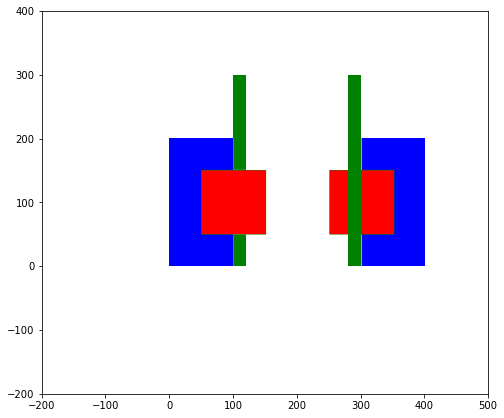

In [3]:
# create a new figure with an axes with different extents that the original axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-200, 500)
ax.set_ylim(-200, 400)

# add a few green rectangles to show that with changed axes extents
# the loaded image is plotted in the correct place and has transparency
rect = mpatches.Rectangle(
    (100, 0), 20, 300, linewidth=1, edgecolor="none", facecolor="g"
)
ax.add_patch(rect)
rect = mpatches.Rectangle(
    (300, 0), -20, 300, linewidth=1, edgecolor="none", facecolor="g", zorder=2
)
ax.add_patch(rect)

# add the content of the previous figure's axes from the image stored above
# note that the loaded content is plotted with `zorder=1`, you can change
# this if you want to change the z-ordering relative to other things in your
# new figure
mpl_aic.load_and_plot_image(ax=ax, fpath="test.png")

# save the final figure to an image so we can show it in the README
fig.savefig("final.png")